In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import quaternion
from scipy.spatial.transform import Rotation as R
import sklearn

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-pipeline\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Varun\AppData\Local\Temp\ipykernel_9404\2724482610.py", line 1, in <module>
    import matplotlib.pyplot as plt
ModuleNotFoundError: No module named 'matplotlib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-pipeline\.venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-pipeline\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-pipeline\.venv\Lib\site-packages\

In [ ]:
file_path="Version2\\V2 (1)\\v2_video_1_vr_data_20220323T173139.csv"

: 

In [5]:
NOSSDAV_train=pd.read_csv("StagedData\\NOSSDAV_train.csv")
NOSSDAV_test=pd.read_csv("StagedData\\NOSSDAV_test.csv")
user_train=set(NOSSDAV_train['user'])
user_test=set(NOSSDAV_test['user'])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-pipeline\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Varun\AppData\Local\Temp\ipykernel_9404\841500022.py", line 1, in <module>
    NOSSDAV_train=pd.read_csv("StagedData\\NOSSDAV_train.csv")
                  ^^
NameError: name 'pd' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-pipeline\.venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-pipeline\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
  File "c:\Users\Varun\Desktop\Projects\Thesis\XR-

In [12]:
all_users_in_test = all(user in user_train for user in user_test)
print(all_users_in_test)

False


In [6]:
user_train

{'user21',
 'user22',
 'user28',
 'user30',
 'user35',
 'user36',
 'user37',
 'user44',
 'user46',
 'user47',
 'user48',
 'user49'}

In [3]:
df=pd.read_csv(file_path)

In [4]:
df.columns

Index(['AdjustedTime', 'Pose_Position', 'Pose_Rotation', 'Unit_Vector',
       'LeftGazeDirection', 'RightGazeDirection', 'Pose_Point', 'Pose_Point_x',
       'Pose_Point_y', 'RightGazePoint', 'RightGazePoint_x',
       'RightGazePoint_y', 'LeftGazePoint', 'LeftGazePoint_x',
       'LeftGazePoint_y'],
      dtype='object')

In [5]:
head_position=df[['AdjustedTime', 'Pose_Position', 'Pose_Rotation', 'Unit_Vector']]

In [6]:
head_position['Pose_Position']=head_position['Pose_Position'].apply(eval)
head_position['Pose_Rotation']=head_position['Pose_Rotation'].apply(eval)
head_position['Unit_Vector']=head_position['Unit_Vector'].apply(eval)

C:\Users\Varun\AppData\Local\Temp\ipykernel_32040\2010035044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_position['Pose_Position']=head_position['Pose_Position'].apply(eval)
C:\Users\Varun\AppData\Local\Temp\ipykernel_32040\2010035044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_position['Pose_Rotation']=head_position['Pose_Rotation'].apply(eval)
C:\Users\Varun\AppData\Local\Temp\ipykernel_32040\2010035044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [13]:
spatial_position=pd.DataFrame(columns=['X','Y','Z'])

In [14]:
spatial_position[['X','Y','Z']]=pd.DataFrame(head_position['Pose_Position'].tolist())

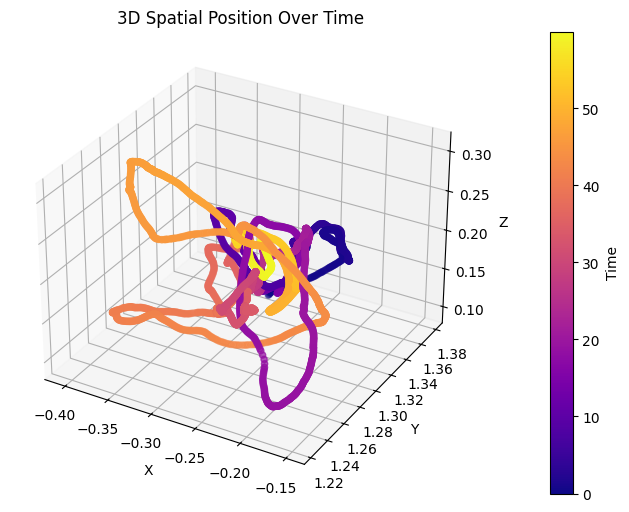

: 

In [17]:
# Normalize time values to create a color gradient
norm = plt.Normalize(head_position['AdjustedTime'].min(), head_position['AdjustedTime'].max())
cmap = plt.get_cmap('plasma')

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color gradient
sc = ax.scatter(spatial_position['X'], spatial_position['Y'], spatial_position['Z'], c=head_position['AdjustedTime'], cmap=cmap, norm=norm, marker='o')

# Colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Time')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Spatial Position Over Time')

plt.show()

In [14]:
head_position['Pose_Rotation'].iloc[0]

(-0.01948241, 0.9699373, 0.09336495, 0.223886)

In [15]:
head_position['Q0']=head_position['Pose_Rotation'].apply(lambda x:x[0])
head_position['Q1']=head_position['Pose_Rotation'].apply(lambda x:x[1])
head_position['Q2']=head_position['Pose_Rotation'].apply(lambda x:x[2])
head_position['Q3']=head_position['Pose_Rotation'].apply(lambda x:x[3])

C:\Users\Varun\AppData\Local\Temp\ipykernel_34608\3737732704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_position['Q0']=head_position['Pose_Rotation'].apply(lambda x:x[0])
C:\Users\Varun\AppData\Local\Temp\ipykernel_34608\3737732704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_position['Q1']=head_position['Pose_Rotation'].apply(lambda x:x[1])
C:\Users\Varun\AppData\Local\Temp\ipykernel_34608\3737732704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

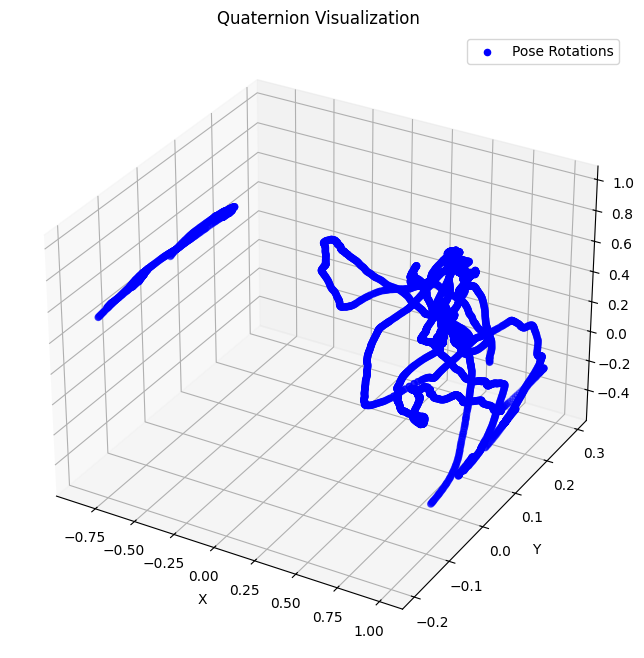

In [16]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot quaternions as points in 3D space
ax.scatter(head_position['Q1'], head_position['Q2'], head_position['Q3'], c='b', marker='o', label='Pose Rotations')
# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quaternion Visualization')
plt.legend()

# Show plot
plt.show()

In [33]:
head_position['Quaternion']=head_position['Pose_Rotation'].apply(lambda x: np.quaternion(*x))

C:\Users\Varun\AppData\Local\Temp\ipykernel_34608\3914080008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_position['Quaternion']=head_position['Pose_Rotation'].apply(lambda x: np.quaternion(*x))


In [35]:
def quaternion_to_euler(q):
    # Normalize quaternion to avoid numerical issues
    q = q.normalized()
    # Extract components of quaternion
    w, x, y, z = q.w, q.x, q.y, q.z
    # Calculate Euler angles (in radians)
    roll = np.arctan2(2 * (w*x + y*z), 1 - 2 * (x**2 + y**2))
    pitch = np.arcsin(2 * (w*y - z*x))
    yaw = np.arctan2(2 * (w*z + x*y), 1 - 2 * (y**2 + z**2))
    # Convert radians to degrees
    roll, pitch, yaw = np.degrees(roll), np.degrees(pitch), np.degrees(yaw)
    return roll, pitch, yaw

In [36]:
df['Roll'], df['Pitch'], df['Yaw'] = zip(*head_position['Quaternion'].apply(quaternion_to_euler))

In [29]:
quaternion.as_rotation_matrix(head_position['Quaternion'][0])

array([[ 0.88231608,  0.18983999,  0.43067287],
       [ 0.17239264, -0.98180684,  0.07959965],
       [ 0.43794876,  0.00401278, -0.89899098]])

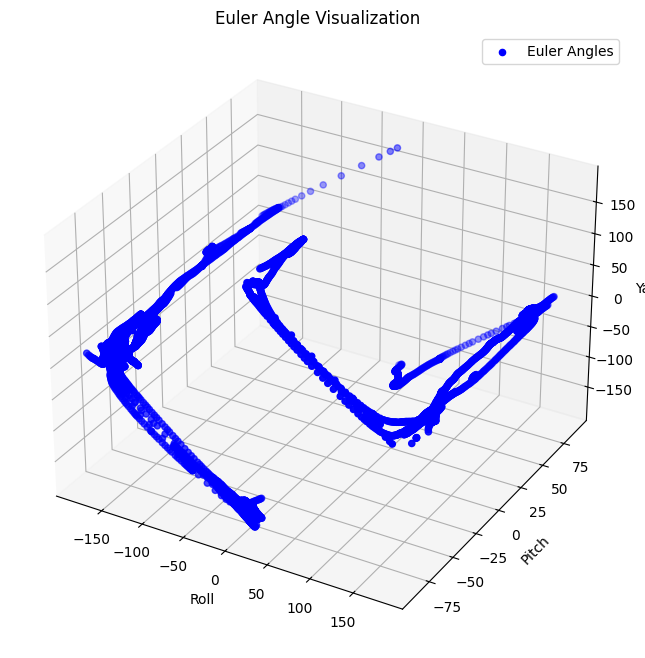

In [37]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Euler angles as points in 3D space
ax.scatter(df['Roll'], df['Pitch'], df['Yaw'], c='b', marker='o', label='Euler Angles')

# Set plot labels and title
ax.set_xlabel('Roll')
ax.set_ylabel('Pitch')
ax.set_zlabel('Yaw')
ax.set_title('Euler Angle Visualization')
plt.legend()

# Show plot
plt.show()

In [21]:
head_position['Pose_Rotation'][0]

(-0.01948241, 0.9699373, 0.09336495, 0.223886)